In [2]:
import numpy as np
import pandas as pd


# DORN

## On-boarding questions

In [9]:
df_dorn_qns_raw = pd.read_csv("data/df_info_subjects_raw_DORN.csv", index_col=0)
print(f'Raw features: {df_dorn_qns_raw.columns.values}')xw
print(f'Dimensions: {df_dorn_qns_raw.shape}')
print(df_dorn_qns_raw['Health'].unique())
print(df_dorn_qns_raw['Q33_1'].unique())
df_dorn_qns_raw.head(5)


Raw features: ['Subject ID' 'Q26' 'Sex' 'Height' 'Weight' 'Education' 'Place of birth'
 'Q40' 'Years in SG' 'postcode_home' 'postcode_work' 'Health' 'Cold hand'
 'Exercise' 'Coffee consumption' 'Alcohol consumption' 'Smoke' 'Q33_1'
 'Q33_2' 'Q33_3' 'Q33_4' 'Q33_5' 'Q33_6' 'Q33_7' 'Q33_8' 'Q33_9' 'Q33_10'
 'Q33_11' 'Q33_12' 'Q34_1' 'Q34_2' 'Q34_3' 'Q34_4' 'Q34_5' 'Q36_1' 'Q36_2'
 'Q36_3' 'Q36_4' 'Q36_5' 'Q36_6' 'Q36_7' 'Q36_8' 'Q36_9' 'Q36_10' 'Age']
Dimensions: (20, 45)
['No' 'None' 'Hypertension' 'Nil' 'no' 'NO' nan 'NIL' 'sinus'
 'mild hay fever']
['2' 'Moderately' '8' '11' '15' 'Not at all']


,Subject ID,Q26,Sex,Height,Weight,Education,Place of birth,Q40,Years in SG,postcode_home,...,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Age
2,3.0,1990,Male,177,80,Doctoral degree,"Shanxi, China","Singapore, Singapore",1-Feb,118676,...,Neither agree nor disagree,Agree,Slightly Disagree,Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Slightly Disagree,Disagree,30
3,5.0,1989,Male,173,76,Doctoral degree,"Jining, Shandong Province, China","Singapore, Singapore",1-Feb,118676,...,Slightly Agree,Slightly Agree,Slightly Disagree,Neither agree nor disagree,Neither agree nor disagree,Slightly Agree,Disagree,Agree,Slightly Disagree,31
4,2.0,1984,Male,173,88,Doctoral degree,"Bhubaneswar, India","Singapore, Singapore",More than 4,388598,...,Disagree,Slightly Agree,Slightly Disagree,Slightly Agree,Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree,36
5,8.0,1985,Male,152,58,Doctoral degree,Hong Kong,Singapore,More than 4,120335,...,Disagree,Slightly Disagree,Slightly Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree,Agree,Slightly Agree,35
7,15.0,1987,Female,170,53,Doctoral degree,"Padova, Italy","Singapore, Singapore",More than 4,118687,...,Slightly Agree,Slightly Disagree,Disagree,Slightly Agree,Slightly Agree,Slightly Agree,Disagree,Disagree,Disagree,33


In [10]:
# rename columns
rename_cols = ['user_id', # 'Subject ID'
               'yob', # 'Q26'
               'sex', # 'Sex'
               'height', 
               'weight',
               'education',
               'pob', # 'Place of birth'
               'country_living', # 'Q40'
               'years_here', # 'Years in SG'
               'postcode_home',
               'postcode_work',
               'health',
               'cold_hand',
               'exercise',
               'coffee_consumption',
               'alcohol_consumption',
               'smoke',
               'subtleties_awareness', # Q33, scale from 1 to 7
               'overwhelemed_awareness',
               'rich_life',
               'rattled',
               'deeply_moved',
               'annoyed',
               'violent_movies',
               'unpleasant',
               'changes_shake',
               'delicates',
               'stimuli_awareness',
               'nervous',
               'life_ideal', # Q34, scale from 1 to 7
               'life_conditions',
               'life_satisfaction',
               'important_things',
               'life_changes',
               'extraverted', # Q36, scale from 1 to 7
               'critical',
               'dependable',
               'anxious',
               'new_exp',
               'reserved',
               'sympathetic',
               'disorganized',
               'calm',
               'conventional',
               'age' # age
              ]
df_dorn_qns_renamed = df_dorn_qns_raw.copy()
df_dorn_qns_renamed.columns = rename_cols
df_dorn_qns_renamed['user_id'] = df_dorn_qns_renamed['user_id'].astype('int64')
df_dorn_qns_renamed['user_id'] = ['dorn' + str(user_id) for user_id in df_dorn_qns_renamed['user_id']]
# remap Q33
qns_mapping = {"Not at all":1, '2':2, '8':3, "Moderately":4, '11':5, '15':6, "Extremely":7}
df_dorn_qns_renamed['subtleties_awareness'] = df_dorn_qns_renamed['subtleties_awareness'].map(qns_mapping)
df_dorn_qns_renamed['overwhelemed_awareness'] = df_dorn_qns_renamed['overwhelemed_awareness'].map(qns_mapping)
df_dorn_qns_renamed['rich_life'] = df_dorn_qns_renamed['rich_life'].map(qns_mapping)
df_dorn_qns_renamed['rattled'] = df_dorn_qns_renamed['rattled'].map(qns_mapping)
df_dorn_qns_renamed['deeply_moved'] = df_dorn_qns_renamed['deeply_moved'].map(qns_mapping) 
df_dorn_qns_renamed['annoyed'] = df_dorn_qns_renamed['annoyed'].map(qns_mapping)
df_dorn_qns_renamed['violent_movies'] = df_dorn_qns_renamed['violent_movies'].map(qns_mapping)
df_dorn_qns_renamed['unpleasant'] = df_dorn_qns_renamed['unpleasant'].map(qns_mapping)
df_dorn_qns_renamed['changes_shake'] = df_dorn_qns_renamed['changes_shake'].map(qns_mapping)
df_dorn_qns_renamed['delicates'] = df_dorn_qns_renamed['delicates'].map(qns_mapping)
df_dorn_qns_renamed['stimuli_awareness'] = df_dorn_qns_renamed['stimuli_awareness'].map(qns_mapping)
df_dorn_qns_renamed['nervous'] = df_dorn_qns_renamed['nervous'].map(qns_mapping)
# save renamed file
df_dorn_qns_renamed.to_csv('data/DORN_qns_raw.csv')

drop_columns = ['yob',
                'education',
                'pob',
                'country_living',
                'years_here',
                'postcode_home',
                'postcode_work',
                'health',
                'cold_hand',
                'exercise',
                'coffee_consumption',
                'alcohol_consumption',
                'smoke',
                'age',
               ]

# drop columns for initial filtering
df_dorn_qns_filtered = df_dorn_qns_renamed.drop(drop_columns, axis=1)
print(f'Filtered features:\n {df_dorn_qns_filtered.columns.values}')
print(f'New dimensions: {df_dorn_qns_filtered.shape}')
df_dorn_qns_filtered.to_csv('data/DORN_qns_all.csv', index=False)

# drop columns for further filtering
drop_columns = [
    'subtleties_awareness',
    'overwhelemed_awareness',
    'rich_life',
    'rattled',
    'deeply_moved',
    'annoyed',
    'violent_movies',
    'unpleasant',
    'changes_shake',
    'delicates',
    'stimuli_awareness',
    'nervous',
    'life_ideal',
    'life_conditions',
    'life_satisfaction',
    'important_things',
    'life_changes',
    'extraverted',
    'critical',
    'dependable',
    'anxious',
    'new_exp',
    'reserved',
    'sympathetic',
    'disorganized',
    'calm',
    'conventional',
]

print('\nReducing features...')
df_dorn_qns_filtered_2 = df_dorn_qns_filtered.drop(drop_columns, axis=1)
print(f'Filtered features:\n {df_dorn_qns_filtered_2.columns.values}')
print(f'New dimensions: {df_dorn_qns_filtered_2.shape}')
df_dorn_qns_filtered_2.to_csv('data/DORN_qns_phy.csv', index=False)


Filtered features:
 ['user_id' 'sex' 'height' 'weight' 'subtleties_awareness'
 'overwhelemed_awareness' 'rich_life' 'rattled' 'deeply_moved' 'annoyed'
 'violent_movies' 'unpleasant' 'changes_shake' 'delicates'
 'stimuli_awareness' 'nervous' 'life_ideal' 'life_conditions'
 'life_satisfaction' 'important_things' 'life_changes' 'extraverted'
 'critical' 'dependable' 'anxious' 'new_exp' 'reserved' 'sympathetic'
 'disorganized' 'calm' 'conventional']
New dimensions: (20, 31)

Reducing features...
Filtered features:
 ['user_id' 'sex' 'height' 'weight']
New dimensions: (20, 4)


### HSPS, SWL, and B5P

In [11]:
# load dataframe with all the questions
df_dorn_qns_renamed = pd.read_csv('data/DORN_qns_raw.csv')

# only retain the features for sex and:
# Highly sensitive person scale HSPS
# Satisfaction With Life Scale SWLS
# Big Five Personality

needed_cols = ['user_id',
               'sex', # 'Sex'
               'subtleties_awareness', # Q33, scale from 1 to 7 (HSPS)
               'overwhelemed_awareness',
               'rich_life',
               'rattled',
               'deeply_moved',
               'annoyed',
               'violent_movies',
               'unpleasant',
               'changes_shake',
               'delicates',
               'stimuli_awareness',
               'nervous',
               'life_ideal', # Q34, scale from 1 to 7 (SWLS)
               'life_conditions',
               'life_satisfaction',
               'important_things',
               'life_changes',
               'extraverted', # Q36, scale from 1 to 7 (big 5 personality trait)
               'critical',
               'dependable',
               'anxious',
               'new_exp',
               'reserved',
               'sympathetic',
               'disorganized',
               'calm',
               'conventional',
]
df_hsps_swls_b5p = df_dorn_qns_renamed[needed_cols]
df_hsps_swls_b5p.to_csv('data/DORN_qns_hsps_swls_b5p_raw.csv', index=False)
df_hsps_swls_b5p


,user_id,sex,subtleties_awareness,overwhelemed_awareness,rich_life,rattled,deeply_moved,annoyed,violent_movies,unpleasant,...,extraverted,critical,dependable,anxious,new_exp,reserved,sympathetic,disorganized,calm,conventional
0,dorn3,Male,2,2,3,4,4,4,2,3,...,Neither agree nor disagree,Neither agree nor disagree,Agree,Slightly Disagree,Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Slightly Disagree,Disagree
1,dorn5,Male,4,4,4,5,6,7,3,7,...,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Neither agree nor disagree,Neither agree nor disagree,Slightly Agree,Disagree,Agree,Slightly Disagree
2,dorn2,Male,4,7,7,6,3,6,2,5,...,Disagree,Disagree,Slightly Agree,Slightly Disagree,Slightly Agree,Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree
3,dorn8,Male,3,5,4,6,1,6,1,5,...,Agree,Disagree,Slightly Disagree,Slightly Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree,Agree,Slightly Agree
4,dorn15,Female,5,6,4,3,5,3,6,3,...,Slightly Disagree,Slightly Agree,Slightly Disagree,Disagree,Slightly Agree,Slightly Agree,Slightly Agree,Disagree,Disagree,Disagree
5,dorn13,Male,5,3,3,2,4,3,5,2,...,Neither agree nor disagree,Disagree,Agree,Strongly Disagree,Slightly Agree,Agree,Neither agree nor disagree,Slightly Disagree,Agree,Disagree
6,dorn11,Female,4,4,5,5,6,5,3,5,...,Slightly Agree,Slightly Agree,Neither agree nor disagree,Slightly Disagree,Slightly Agree,Disagree,Slightly Agree,Slightly Disagree,Slightly Disagree,Slightly Disagree
7,dorn14,Male,4,3,3,4,5,6,4,5,...,Agree,Agree,Agree,Slightly Agree,Slightly Agree,Slightly Agree,Strongly Agree,Slightly Agree,Neither agree nor disagree,Slightly Disagree
8,dorn7,Female,4,5,2,7,7,7,4,7,...,Slightly Agree,Slightly Agree,Neither agree nor disagree,Slightly Agree,Strongly Agree,Slightly Disagree,Agree,Slightly Agree,Neither agree nor disagree,Disagree
9,dorn9,Female,4,6,4,6,5,6,6,6,...,Slightly Disagree,Agree,Slightly Agree,Agree,Slightly Agree,Disagree,Slightly Agree,Agree,Agree,Slightly Disagree


### HSPS

In [12]:
# load dataframe with all the questions
df_hsps_swls_b5p = pd.read_csv('data/DORN_qns_hsps_swls_b5p_raw.csv')

# only retain the features for sex and:
# Highly sensitive person scale HSPS

needed_cols = ['user_id',
               'sex', # 'Sex'
               'subtleties_awareness', # Q33, scale from 1 to 7 (HSPS)
               'overwhelemed_awareness',
               'rich_life',
               'rattled',
               'deeply_moved',
               'annoyed',
               'violent_movies',
               'unpleasant',
               'changes_shake',
               'delicates',
               'stimuli_awareness',
               'nervous',
]
df_hsps = df_hsps_swls_b5p[needed_cols]
df_hsps.to_csv('data/DORN_qns_hsps_raw.csv', index=False)
df_hsps.head(5)

,user_id,sex,subtleties_awareness,overwhelemed_awareness,rich_life,rattled,deeply_moved,annoyed,violent_movies,unpleasant,changes_shake,delicates,stimuli_awareness,nervous
0,dorn3,Male,2,2,3,4,4,4,2,3,5,3,2,2
1,dorn5,Male,4,4,4,5,6,7,3,7,5,6,6,5
2,dorn2,Male,4,7,7,6,3,6,2,5,6,5,4,4
3,dorn8,Male,3,5,4,6,1,6,1,5,4,2,6,5
4,dorn15,Female,5,6,4,3,5,3,6,3,5,5,6,2


### SWLS

In [13]:
# load dataframe with all the questions
df_hsps_swls_b5p = pd.read_csv('data/DORN_qns_hsps_swls_b5p_raw.csv')

# only retain the features for sex and:
# Satisfaction With Life Scale SWLS

needed_cols = ['user_id',
               'sex', # 'Sex'
               'life_ideal', # Q34, scale from 1 to 7 (SWLS)
               'life_conditions',
               'life_satisfaction',
               'important_things',
               'life_changes',
]
df_swls = df_hsps_swls_b5p[needed_cols]
df_swls.to_csv('data/DORN_qns_swls_raw.csv', index=False)
df_swls.head(5)

,user_id,sex,life_ideal,life_conditions,life_satisfaction,important_things,life_changes
0,dorn3,Male,Slightly Disagree,Neither agree nor disagree,Slightly Agree,Agree,Slightly Disagree
1,dorn5,Male,Slightly Disagree,Slightly Disagree,Slightly Disagree,Slightly Disagree,Neither agree nor disagree
2,dorn2,Male,Slightly Agree,Agree,Agree,Neither agree nor disagree,Slightly Agree
3,dorn8,Male,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Agree
4,dorn15,Female,Slightly Disagree,Slightly Disagree,Slightly Disagree,Disagree,Slightly Disagree


### B5P

In [14]:
# load dataframe with all the questions
df_hsps_swls_b5p = pd.read_csv('data/DORN_qns_hsps_swls_b5p_raw.csv')

# only retain the features for sex and:
# Big Five Personality

needed_cols = ['user_id',
               'extraverted', # Q36, scale from 1 to 7 (big 5 personality trait)
               'critical',
               'dependable',
               'anxious',
               'new_exp',
               'reserved',
               'sympathetic',
               'disorganized',
               'calm',
               'conventional',
]
df_b5p_sex = df_hsps_swls_b5p[needed_cols]
df_b5p_sex.to_csv('data/DORN_qns_b5p_raw.csv', index=False)
df_b5p_sex.head(5)


,user_id,extraverted,critical,dependable,anxious,new_exp,reserved,sympathetic,disorganized,calm,conventional
0,dorn3,Neither agree nor disagree,Neither agree nor disagree,Agree,Slightly Disagree,Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Slightly Disagree,Disagree
1,dorn5,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Neither agree nor disagree,Neither agree nor disagree,Slightly Agree,Disagree,Agree,Slightly Disagree
2,dorn2,Disagree,Disagree,Slightly Agree,Slightly Disagree,Slightly Agree,Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree
3,dorn8,Agree,Disagree,Slightly Disagree,Slightly Agree,Agree,Neither agree nor disagree,Agree,Slightly Agree,Agree,Slightly Agree
4,dorn15,Slightly Disagree,Slightly Agree,Slightly Disagree,Disagree,Slightly Agree,Slightly Agree,Slightly Agree,Disagree,Disagree,Disagree


### Remapping form TIPI to B5P and each B5P trait

In [15]:
df_b5p = pd.read_csv('data/DORN_qns_b5p_raw.csv', skipinitialspace=True)
b5p_raw = [
    'extraverted',
    'critical',
    'dependable',
    'anxious',
    'new_exp',
    'reserved',
    'sympathetic',
    'disorganized',
    'calm',
    'conventional'
]
for col in b5p_raw:
    df_b5p[col] = df_b5p[col].replace({
        "Strongly Disagree": 1,
        "Disagree": 2,
        "Slightly Disagree": 3,
        "Neither agree nor disagree": 4,
        "Slightly Agree": 5,
        "Agree": 6,
        "Strongly Agree": 7,
    })

# mapping from TIPI to B5
# ref: http://gosling.psy.utexas.edu/wp-content/uploads/2014/09/JRP-03-tipi.pdf
b5p_qns = {
    'extraversion': ['extraverted', 'reserved'],
    'agreeableness': ['critical', 'sympathetic'],
    'conscientiousness': ['dependable', 'disorganized'],
    'emotional_stability': ['anxious', 'calm'],
    'openness_to_experiences': ['new_exp', 'conventional']
}

reversed = ['reserved', 'critical', 'disorganized', 'anxious', 'conventional']
# calculate reverse score
for rev in reversed:
    df_b5p[rev] = df_b5p[rev].replace({1: 7, 2: 6, 3: 5, 4: 4})
# calculate 5 personality traits
for trait in b5p_qns.keys():
    qns1 = b5p_qns[trait][0]
    qns2 = b5p_qns[trait][1]
    df_b5p[trait] = (df_b5p[qns1] + df_b5p[qns2])/2

# drop raw questions
df_b5p = df_b5p.drop(b5p_raw, axis=1)
df_b5p.to_csv(f'data/DORN_qns_b5p_calc.csv', index=False)
print(df_b5p)

for trait in b5p_qns.keys():
    other_traits = [item for item in b5p_qns.keys() if item != trait]    
    df_b5p_one_trait = df_b5p.drop(other_traits, axis=1)
    df_b5p_one_trait.to_csv(f'data/DORN_qns_b5p_{trait}.csv', index=False)


   user_id  extraversion  agreeableness  conscientiousness  \
0    dorn3           4.5            4.5                5.5   
1    dorn5           4.5            5.0                5.5   
2    dorn2           4.0            6.0                4.5   
3    dorn8           5.0            6.0                4.0   
4   dorn15           4.0            5.0                4.5   
5   dorn13           5.0            5.0                5.5   
6   dorn11           5.5            5.0                4.5   
7   dorn14           5.5            6.5                5.5   
8    dorn7           5.0            5.5                4.5   
9    dorn9           4.5            5.5                5.5   
10  dorn18           6.0            5.5                5.5   
11  dorn16           4.0            6.0                5.0   
12  dorn17           3.0            4.0                3.5   
13  dorn10           3.5            5.0                5.5   
14  dorn20           5.5            3.5                6.0   
15   dor

### HSPS & SWLS (calc) & phy

In [4]:
# load dataframe with all the questions
df_dorn_qns_renamed = pd.read_csv('data/DORN_qns_raw.csv')
df_hsps_swls = pd.read_csv('data/DORN_qns_phy.csv')

# compute the score of Highly Sensitive Person Scale (HSPS)
hsps_cols = ['subtleties_awareness', # Q33, scale from 1 to 7
             'overwhelemed_awareness',
             'rich_life',
             'rattled',
             'deeply_moved',
             'annoyed',
             'violent_movies',
             'unpleasant',
             'changes_shake',
             'delicates',
             'stimuli_awareness',
             'nervous']
df_hsps_swls['hsps'] = round(
    df_dorn_qns_renamed[[x for x in df_dorn_qns_renamed.columns 
                         if x in hsps_cols]].sum(axis=1)/12 + 1, 1
    )

# compute score of Satisfaction With Life Scale (SWLS)
swls_cols = ['life_ideal', # Q34, scale from 1 to 7
             'life_conditions',
             'life_satisfaction',
             'important_things',
             'life_changes']

df_hsps_swls['swls'] = df_dorn_qns_renamed[[x for x in df_dorn_qns_renamed.columns 
    if x in swls_cols]].replace(
        {"Strongly Disagree": 1,
         "Disagree": 2,
         "Slightly Disagree": 3,
         "Neither agree nor disagree": 4,
         "Slightly Agree": 5,
         "Agree": 6,
         "Strongly Agree": 7,
         }
    ).sum(axis=1)

# satisfaction = []
# for score in df_hsps_swls['swls']:
#     if score > 30:
# #         satisfaction.append("Extremely satisfied")
#         satisfaction.append(7)
#     elif score > 25:
# #         satisfaction.append("Satisfied")
#         satisfaction.append(6)
#     elif score > 20:
# #         satisfaction.append("Slightly satisfied")
#         satisfaction.append(5)
#     elif score == 20:
# #         satisfaction.append("Neutral")
#         satisfaction.append(4)
#     elif score > 14:
# #         satisfaction.append("Slightly dissatisfied")
#         satisfaction.append(3)
#     elif score > 9:
# #         satisfaction.append("Dissatisfied")
#         satisfaction.append(2)
#     else:
# #         satisfaction.append("Extremely dissatisfied")
#         satisfaction.append(1)
# df_hsps_swls['swls'] = satisfaction

df_hsps_swls.to_csv('data/DORN_qns_hsps_swls_phy.csv', index=False)
df_hsps_swls


,user_id,sex,height,weight,hsps,swls
0,dorn3,Male,177,80,4.0,21
1,dorn5,Male,173,76,6.2,16
2,dorn2,Male,173,88,5.9,26
3,dorn8,Male,152,58,5.0,26
4,dorn15,Female,170,53,5.4,14
5,dorn13,Male,181,83,4.2,26
6,dorn11,Female,165,55,5.4,23
7,dorn14,Male,168,65,5.2,8
8,dorn7,Female,180,84,6.2,5
9,dorn9,Female,151,53,6.2,30


### HSPS & SWLS (calc)

In [5]:
df_hsps_swls_only = pd.read_csv('data/DORN_qns_hsps_swls_phy.csv')
df_hsps_swls_only = df_hsps_swls_only.drop(['sex', 'height', 'weight'], axis=1)
df_hsps_swls_only.to_csv('data/DORN_qns_hsps_swls_calc.csv', index=False)
df_hsps_swls_only

,user_id,hsps,swls
0,dorn3,4.0,21
1,dorn5,6.2,16
2,dorn2,5.9,26
3,dorn8,5.0,26
4,dorn15,5.4,14
5,dorn13,4.2,26
6,dorn11,5.4,23
7,dorn14,5.2,8
8,dorn7,6.2,5
9,dorn9,6.2,30


### HSPS & SWLS (calc) & B5P (remapped)

In [6]:
df_hsps_swls_only = pd.read_csv('data/DORN_qns_hsps_swls_calc.csv')
df_b5p = pd.read_csv('data/DORN_qns_b5p_calc.csv')
df_hsps_swls_b5p_calc = pd.merge(df_hsps_swls_only, df_b5p, on='user_id')
df_hsps_swls_b5p_calc.to_csv('data/DORN_qns_hsps_swls_b5p_calc.csv', index=False)
print(df_hsps_swls_b5p_calc)


   user_id  hsps  swls  extraversion  agreeableness  conscientiousness  \
0    dorn3   4.0    21           4.5            4.5                5.5   
1    dorn5   6.2    16           4.5            5.0                5.5   
2    dorn2   5.9    26           4.0            6.0                4.5   
3    dorn8   5.0    26           5.0            6.0                4.0   
4   dorn15   5.4    14           4.0            5.0                4.5   
5   dorn13   4.2    26           5.0            5.0                5.5   
6   dorn11   5.4    23           5.5            5.0                4.5   
7   dorn14   5.2     8           5.5            6.5                5.5   
8    dorn7   6.2     5           5.0            5.5                4.5   
9    dorn9   6.2    30           4.5            5.5                5.5   
10  dorn18   4.6    28           6.0            5.5                5.5   
11  dorn16   5.4    21           4.0            6.0                5.0   
12  dorn17   7.1     7           3.0  

### HSPS & SWLS & phy (extremes)

In [21]:
# load dataframe with all the questions
df_dorn_qns_renamed = pd.read_csv('data/DORN_qns_raw.csv')
df_hsps_swls_raw = pd.read_csv('data/DORN_qns_phy.csv')

# compute the score of Highly Sensitive Person Scale (HSPS)
hsps_cols = ['subtleties_awareness', # Q33, scale from 1 to 7
             'overwhelemed_awareness',
             'rich_life',
             'rattled',
             'deeply_moved',
             'annoyed',
             'violent_movies',
             'unpleasant',
             'changes_shake',
             'delicates',
             'stimuli_awareness',
             'nervous']
df_hsps_swls_raw['hsps'] = round(
    df_dorn_qns_renamed[[x for x in df_dorn_qns_renamed.columns 
                         if x in hsps_cols]].sum(axis=1)/12 + 1, 1
    )

# compute score of Satisfaction With Life Scale (SWLS)
swls_cols = ['life_ideal', # Q34, scale from 1 to 7
             'life_conditions',
             'life_satisfaction',
             'important_things',
             'life_changes']

df_hsps_swls_raw['swls'] = df_dorn_qns_renamed[[x for x in df_dorn_qns_renamed.columns 
    if x in swls_cols]].replace(
        {"Strongly Disagree": 1,
         "Disagree": 2,
         "Slightly Disagree": 3,
         "Neither agree nor disagree": 4,
         "Slightly Agree": 5,
         "Agree": 6,
         "Strongly Agree": 7,
         }
    ).sum(axis=1)

# df_hsps_swls_raw = df_hsps_swls_raw.drop(['subtleties_awareness', 'overwhelemed_awareness', 'stimuli_awareness'], axis=1)

# look for quantiles of hsps and swls
hsps_q25, hsps_q75, swls_q25, swls_q75 = [], [], [], []

for _, row in df_hsps_swls_raw.iterrows():
    if row['hsps'] <= df_hsps_swls_raw['hsps'].quantile(q=0.25):
        hsps_q25.append(row['user_id'])
    elif row['hsps'] >= df_hsps_swls_raw['hsps'].quantile(q=0.75):
        hsps_q75.append(row['user_id'])
    if row['swls'] <= df_hsps_swls_raw['swls'].quantile(q=0.25):
        swls_q25.append(row['user_id'])
    elif row['swls'] >= df_hsps_swls_raw['swls'].quantile(q=0.75):
        swls_q75.append(row['user_id'])
    

print(df_hsps_swls_raw['hsps'].quantile(q=0.25))
print(hsps_q25)
print(df_hsps_swls_raw['hsps'].quantile(q=0.50))
print(df_hsps_swls_raw['hsps'].quantile(q=0.75))
print(hsps_q75)
print(df_hsps_swls_raw['swls'].quantile(q=0.25))
print(swls_q25)
print(df_hsps_swls_raw['swls'].quantile(q=0.50))
print(df_hsps_swls_raw['swls'].quantile(q=0.75))
print(swls_q75)

extremes_users_hsps = list(set(hsps_q25 + hsps_q75))
extremes_users_swls = list(set(swls_q25 + swls_q75))

print(extremes_users_hsps)
print(extremes_users_swls)

num_samples = 231
df_aux_num_samples = pd.read_csv(f'data/DORN_env_phy_{num_samples}.csv')

df_hsps_swls_raw[df_hsps_swls_raw['user_id'].isin(extremes_users_hsps)].to_csv('data/DORN_qns_hsps_ext_phy.csv', index=False)
df_aux_num_samples[df_aux_num_samples['user_id'].isin(extremes_users_hsps)].to_csv(f'data/DORN_env_phy_{num_samples}_hsps_ext.csv', index=False)

df_hsps_swls_raw[df_hsps_swls_raw['user_id'].isin(extremes_users_swls)].to_csv('data/DORN_qns_swls_ext_phy.csv', index=False)
df_aux_num_samples[df_aux_num_samples['user_id'].isin(extremes_users_swls)].to_csv(f'data/DORN_env_phy_{num_samples}_swls_ext.csv', index=False)

df_hsps_swls_raw.to_csv('data/DORN_qns_hsps_swls_phy_calc.csv', index=False)

df_hsps_swls_raw


4.9
['dorn3', 'dorn13', 'dorn18', 'dorn10', 'dorn20']
5.4
5.9750000000000005
['dorn5', 'dorn7', 'dorn9', 'dorn17', 'dorn19']
16.75
['dorn5', 'dorn15', 'dorn14', 'dorn7', 'dorn17']
21.0
26.5
['dorn9', 'dorn18', 'dorn20', 'dorn6', 'dorn12']
['dorn19', 'dorn7', 'dorn20', 'dorn3', 'dorn17', 'dorn9', 'dorn13', 'dorn5', 'dorn10', 'dorn18']
['dorn6', 'dorn7', 'dorn20', 'dorn17', 'dorn9', 'dorn15', 'dorn12', 'dorn5', 'dorn14', 'dorn18']


,user_id,sex,height,weight,hsps,swls
0,dorn3,Male,177,80,4.0,21
1,dorn5,Male,173,76,6.2,16
2,dorn2,Male,173,88,5.9,26
3,dorn8,Male,152,58,5.0,26
4,dorn15,Female,170,53,5.4,14
5,dorn13,Male,181,83,4.2,26
6,dorn11,Female,165,55,5.4,23
7,dorn14,Male,168,65,5.2,8
8,dorn7,Female,180,84,6.2,5
9,dorn9,Female,151,53,6.2,30


### HSPS & SWLS (extremes)

In [22]:
# extreme values
df_hsps_ext = pd.read_csv('data/DORN_qns_hsps_ext_phy.csv')
df_hsps_ext = df_hsps_ext.drop(['sex', 'height', 'weight'], axis=1)
df_hsps_ext.to_csv('data/DORN_qns_hsps_ext.csv', index=False)

df_swls_ext = pd.read_csv('data/DORN_qns_swls_ext_phy.csv')
df_swls_ext = df_swls_ext.drop(['sex', 'height', 'weight'], axis=1)
df_swls_ext.to_csv('data/DORN_qns_swls_ext.csv', index=False)


## Sensor dataset

In [50]:
df_dorn_features_raw = pd.read_csv("data/df_cozie_env_raw_DORN.csv") 
# df_dorn_features_raw = pd.read_csv("data/df_cozie_env_raw_DORN_old.csv")
# both files above are interchangeable

df_dorn_features_raw['userid'] = ['dorn' + str(userid) for userid in df_dorn_features_raw['userid']]

print(f'Raw features:\n{df_dorn_features_raw.columns.values}')
print(f'Dimensions: {df_dorn_features_raw.shape}')
print('\nFeatures:')
print(df_dorn_features_raw['air-vel'].unique())
print(df_dorn_features_raw['location'].unique())
print(df_dorn_features_raw['clothing'].unique())
print(df_dorn_features_raw['met'].unique())
print(df_dorn_features_raw['met'].value_counts())
print(df_dorn_features_raw['comfort'].unique())
print(df_dorn_features_raw['indoorOutdoor'].unique())
print(df_dorn_features_raw['thermal'].unique())
print(df_dorn_features_raw['voteLog'].unique())
print('\nMissing rows:')
print(df_dorn_features_raw.isna().sum())
df_dorn_features_raw.head(5)

# cat_var = [
#     "clothing",
#     "indoorOutdoor",
#     "location",
#     "met",
#     "hour",
#     "weekend",
#     "userid",
# ]
# scalar_var = [
#     "BMR",
#     "heartRate",
#     "restingHR",
#     "t-skin",
#     "t-nb",
#     "t-env",
#     "rh-env",
# ]

Raw features:
['time' 'BMR' 'air-vel' 'bodyPresence' 'change' 'clothing' 'comfort'
 'experimentid' 'heartRate' 'indoorOutdoor' 'lat' 'location' 'lon' 'met'
 'responseSpeed' 'restingHR' 'thermal' 'userid' 'voteLog' 'unix' 't-skin'
 't-bag' 't-nb' 't-net' 'rh-net' 'CO2' 'Noise' 't-ubi' 'rh-ubi' 'Light'
 't-env' 'rh-env']
Dimensions: (21681, 32)

Features:
['Yes' nan]
['Work' 'Home' 'Portable' 'Other' nan]
['Very light' 'Light' 'Medium' nan 'Heavy']
['sitting' 'resting' 'standing' 'exercising' nan]
sitting       15113
standing       3114
resting        2948
exercising      496
Name: met, dtype: int64
[ 1. nan]
['Indoor' 'Outdoor' nan]
['Cooler' 'No Change' 'Warmer' nan]
[   8.    9.   10. ... 1825. 1826. 1827.]

Missing rows:
time                 0
BMR                139
air-vel           6129
bodyPresence         0
change              12
clothing            10
comfort           9842
experimentid         0
heartRate          108
indoorOutdoor       10
lat              11988
location      

,time,BMR,air-vel,bodyPresence,change,clothing,comfort,experimentid,heartRate,indoorOutdoor,...,t-nb,t-net,rh-net,CO2,Noise,t-ubi,rh-ubi,Light,t-env,rh-env
0,2020-05-18 16:04:04.015000+08:00,1406.0,Yes,True,No,Very light,1.0,dorn,64.0,Indoor,...,33.438,30.3,74.0,NaN,NaN,31.382088,70.0,42.879997,31.382088,70.0
1,2020-05-18 17:14:06.635000+08:00,1406.0,Yes,True,No,Very light,1.0,dorn,60.0,Indoor,...,34.125,30.5,73.0,NaN,NaN,31.665138,68.0,33.809998,31.665138,68.0
2,2020-05-18 18:34:05.956000+08:00,1406.0,Yes,True,No,Very light,1.0,dorn,61.0,Indoor,...,32.812,30.6,72.0,NaN,NaN,31.595711,67.0,39.200001,31.595711,67.0
3,2020-05-19 10:50:39.779000+08:00,1406.0,Yes,True,No,Very light,1.0,dorn,87.0,Indoor,...,31.688,25.9,62.0,NaN,NaN,28.572899,54.0,31.580000,28.572899,54.0
4,2020-05-19 11:39:34.281000+08:00,1406.0,Yes,True,No,Very light,1.0,dorn,69.0,Indoor,...,31.625,29.2,71.0,NaN,NaN,30.084305,68.0,54.139999,30.084305,68.0


Min responses/participant: 872
Max responses/participant: 1332


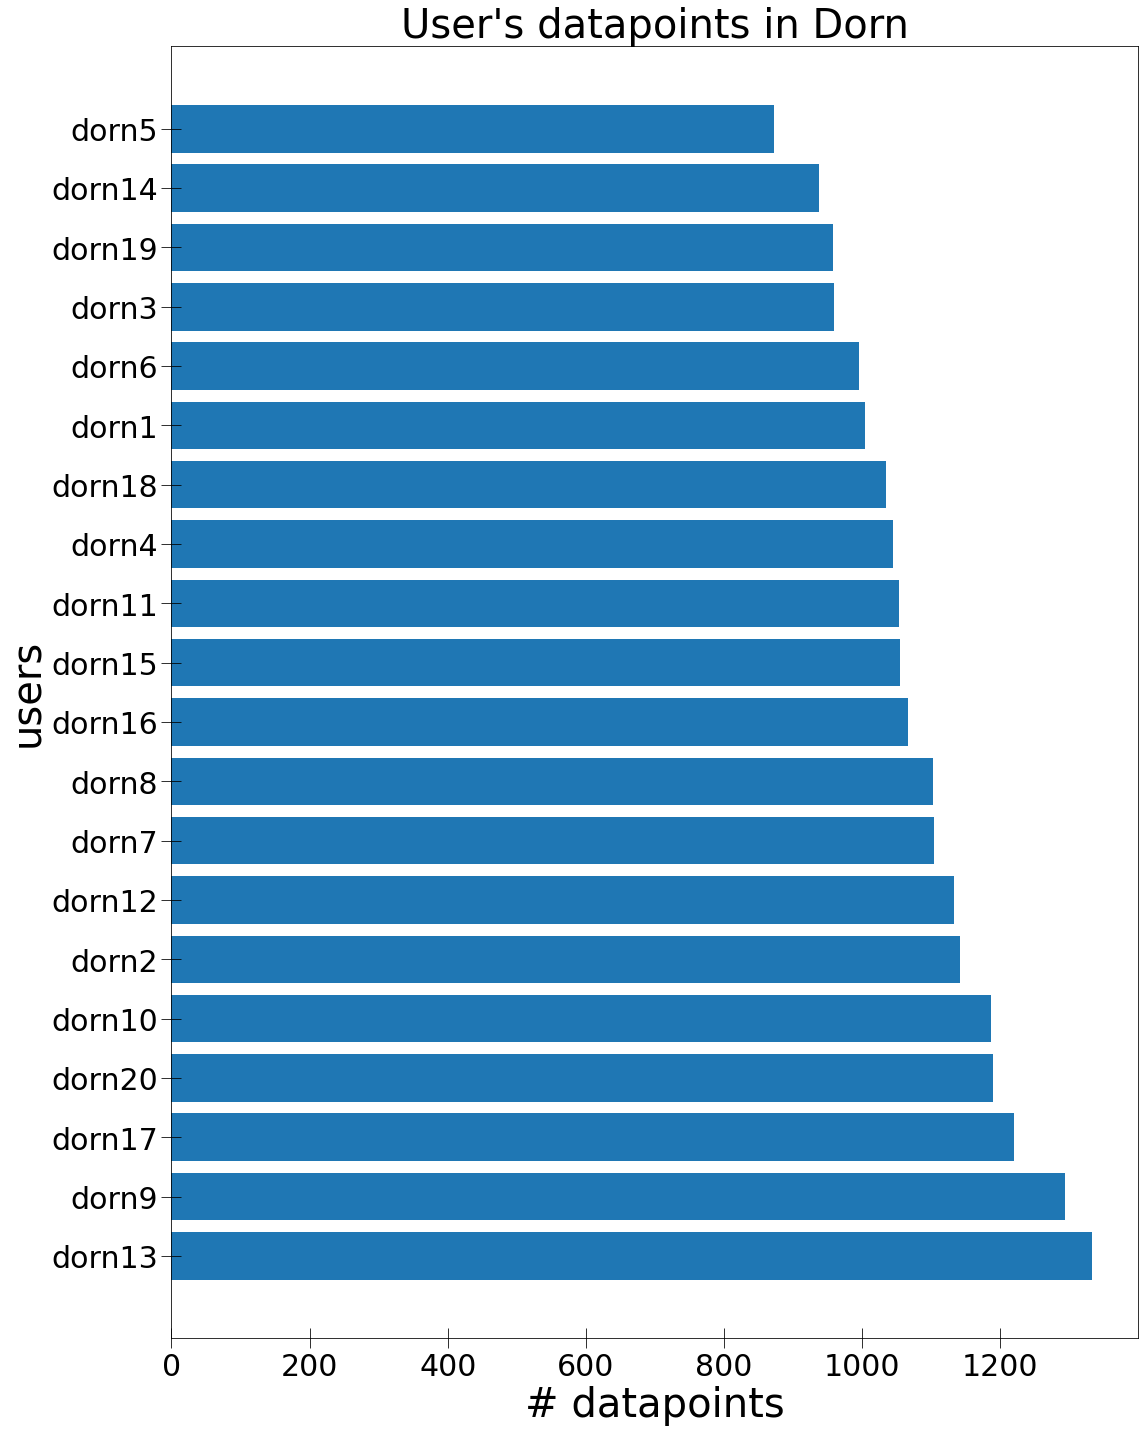

In [51]:
user_data_dist = df_dorn_features_raw['userid'].value_counts()

print(f'Min responses/participant: {min(user_data_dist)}')
print(f'Max responses/participant: {max(user_data_dist)}')

figure, ax = plt.subplots(1, 1, figsize=(16, 20))
ax.barh(user_data_dist.index, user_data_dist, align='center')

ax.tick_params(length=20, direction="inout", labelsize=30)
ax.set_ylabel('users', size=40)
ax.set_xlabel('# datapoints', size=40)
plt.xticks(rotation=0)
# plt.ylim(0.7, 1) # default [0.7, 1]
# ax.set(xticklabels=xticklabels)
ax.set_title('User\'s datapoints in Dorn', size=40)
plt.tight_layout()
plt.show()
figure.savefig(f'img/dorn_datadist_raw.png')

# Min responses/participant: 872
# Max responses/participant: 1332

### Pre-processing

In [52]:
# filtering from original Dorn paper
df_dorn_features_indoor = df_dorn_features_raw.copy()
df_dorn_features_indoor['skin-nb'] = df_dorn_features_indoor[['t-skin', 't-nb']].diff(axis=1)['t-nb']
threshold = df_dorn_features_indoor.groupby(['userid'])['skin-nb'].quantile(0.95).median()
df_dorn_features_indoor = df_dorn_features_indoor[df_dorn_features_indoor["skin-nb"] < threshold]

# only indoor steady-state data
df_dorn_features_indoor = df_dorn_features_indoor[df_dorn_features_indoor["change"] == "No"]
df_dorn_features_indoor = df_dorn_features_indoor[df_dorn_features_indoor["met"] != "Exercising"]
df_dorn_features_indoor = df_dorn_features_indoor[df_dorn_features_indoor["indoorOutdoor"] == "Indoor"]

print(f'\nOnly indoor votes: {df_dorn_features_indoor.shape}')



Only indoor votes: (12032, 33)


Filtered features:
 ['clothing' 'heartRate' 'met' 'thermal_cozie' 'user_id' 't-nb' 't-ubi'
 'rh-ubi']

Missing rows:
clothing           0
heartRate         18
met                0
thermal_cozie      0
user_id            0
t-nb               0
t-ubi            487
rh-ubi           357
dtype: int64

Dropping NaNs rows
clothing         0
heartRate        0
met              0
thermal_cozie    0
user_id          0
t-nb             0
t-ubi            0
rh-ubi           0
dtype: int64
New dimensions: (11529, 8)
New features: ['clothing' 'heartRate' 'met' 'thermal_cozie' 'user_id' 't-nb' 't-ubi'
 'rh-ubi']
Min responses/participant: 231
Max responses/participant: 984


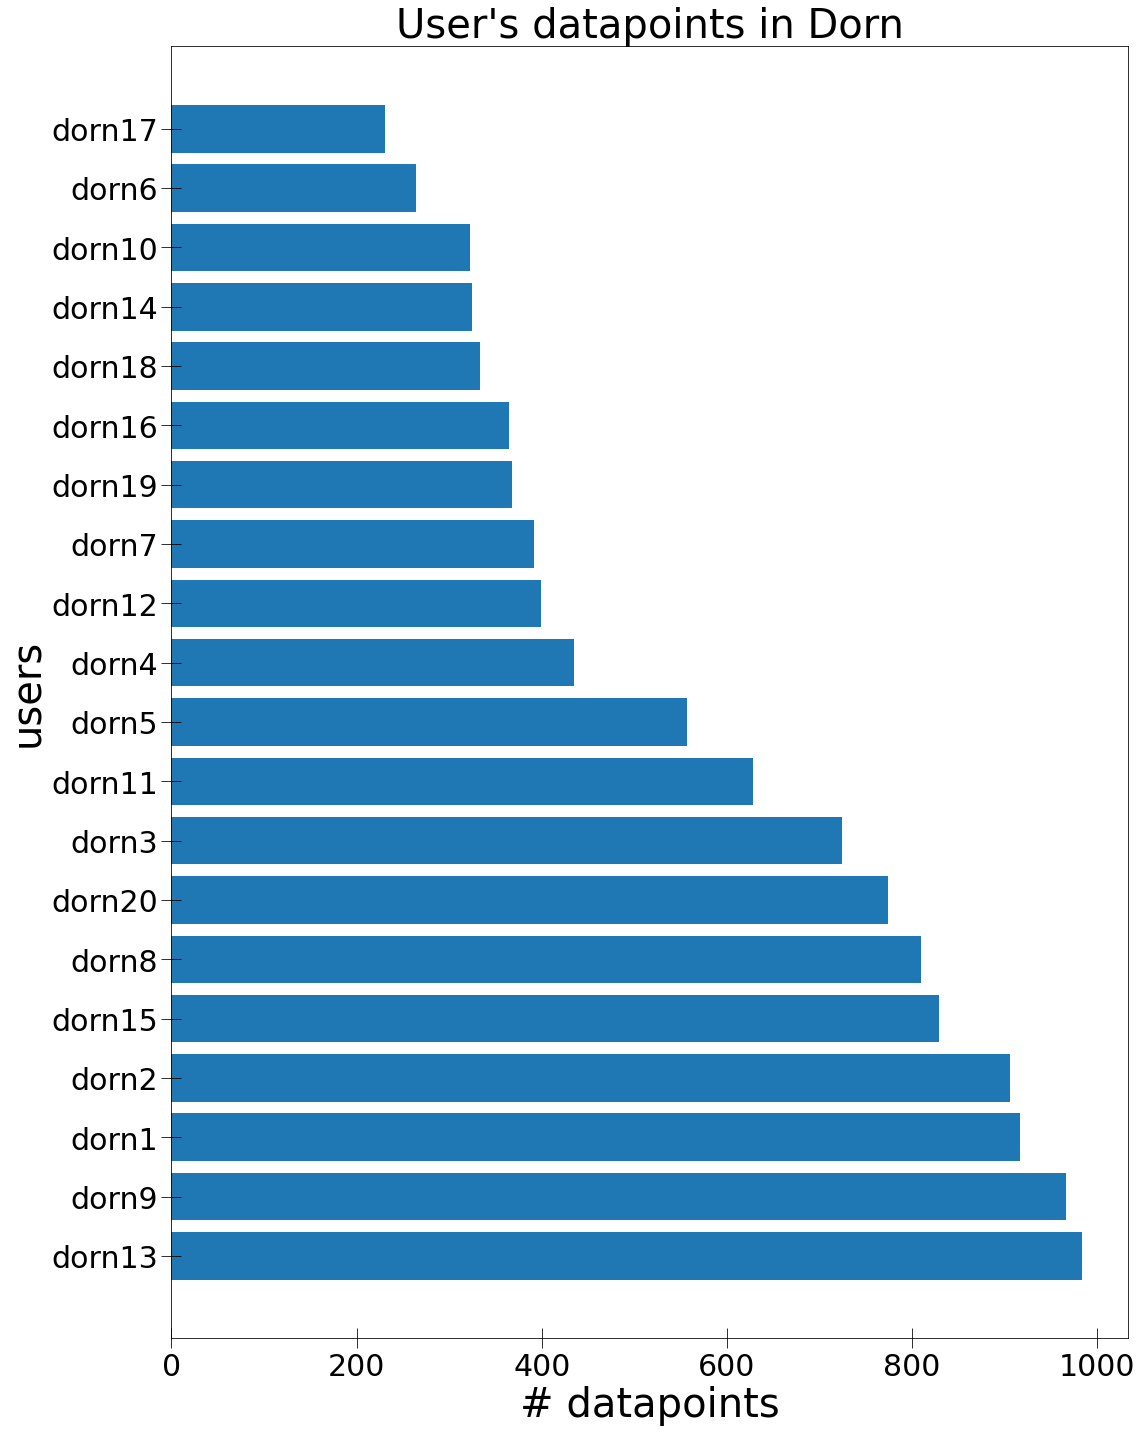

In [53]:
drop_columns = [
    'BMR', # calculated with heigh and weight
    'time',
    'air-vel',
    'bodyPresence',
    'change', 
    'comfort',
    'experimentid', 
    'indoorOutdoor', # whether the vote was outside or not
#     'met', # needed for PMV
    'lat',
    'location',
    'restingHR',
    'lon',
    'responseSpeed',
    'voteLog', # sequence of vote
    'unix',
    'CO2',
    'Noise',
    't-skin', # skin temperature ibutton
    't-bag', # ibutton in the backpack
#   't-nb', # near body air temperature ibutton
    't-net', # temperature netatmo
    'rh-net', # humidity netatmo
#   't-ubi', # temperature ubibot
#   'rh-ubi', # humidity ubibot
    'Light',
    't-env', # env features if location is 'other'
    'rh-env', # env features if location is 'other'
    'skin-nb' # extra feature created in previous cell
]
# drop unused features, rename columns, and remap labels
df_dorn_features_filtered = df_dorn_features_indoor.drop(drop_columns, axis=1)
df_dorn_features_filtered = df_dorn_features_filtered.rename(columns={'thermal':'thermal_cozie', 'userid':'user_id'})
df_dorn_features_filtered['thermal_cozie'] = df_dorn_features_filtered['thermal_cozie'].map({'Warmer':9.0,'No Change':10.0, 'Cooler': 11.0})
print(f'Filtered features:\n {df_dorn_features_filtered.columns.values}')

# drop NaN rows regarding physiological and environmental features features
print('\nMissing rows:')
print(df_dorn_features_filtered.isna().sum())
print('\nDropping NaNs rows')
non_nans_cols = ['t-nb', 
                 't-ubi',
                 'heartRate',
                 'thermal_cozie']
for col in non_nans_cols:
    df_dorn_features_filtered = df_dorn_features_filtered[df_dorn_features_filtered[col].notna()]
print(df_dorn_features_filtered.isna().sum())

print(f'New dimensions: {df_dorn_features_filtered.shape}')
print(f'New features: {df_dorn_features_filtered.columns.values}')

df_dorn_features_filtered_met = df_dorn_features_filtered.copy()
df_dorn_features_filtered_met.to_csv('data/DORN_env_met.csv', index=False)
df_dorn_features_filtered = df_dorn_features_filtered.drop("met", axis=1)
df_dorn_features_filtered.to_csv('data/DORN_env.csv', index=False)

user_data_dist = df_dorn_features_filtered['user_id'].value_counts()

print(f'Min responses/participant: {min(user_data_dist)}')
print(f'Max responses/participant: {max(user_data_dist)}')

figure, ax = plt.subplots(1, 1, figsize=(16, 20))
ax.barh(user_data_dist.index, user_data_dist, align='center')

ax.tick_params(length=20, direction="inout", labelsize=30)
ax.set_ylabel('users', size=40)
ax.set_xlabel('# datapoints', size=40)
plt.xticks(rotation=0)
ax.set_title('User\'s datapoints in Dorn', size=40)
plt.tight_layout()
plt.show()
figure.savefig(f'img/dorn_datadist_filtered.png')

# Min responses/participant: 231
# Max responses/participant: 984

### Merging Questions + Sensor data

In [54]:
###
# merging with (almost) all on-boarding questions
###
df_qns_merge = pd.read_csv('data/DORN_qns_all.csv')
df_dorn_features_filtered = pd.read_csv('data/DORN_env.csv')
df_dorn_features_indoor_merged_all_qns = pd.merge(df_dorn_features_filtered, df_qns_merge, on='user_id')
# move label to the end of the dataframe
df_aux = df_dorn_features_indoor_merged_all_qns.pop('thermal_cozie')
df_dorn_features_indoor_merged_all_qns['thermal_cozie']=df_aux # add b series as a 'new' column.

print('Dataset DORN_env_phy_qns_all')
print(f'Features of merged datasets:\n {df_dorn_features_indoor_merged_all_qns.columns.values}')
print(f'Dimensions of merged datasets: {df_dorn_features_indoor_merged_all_qns.shape}')
df_dorn_features_indoor_merged_all_qns.to_csv('data/DORN_env_qns_all.csv', index=False) # compatible with previous experiments
df_dorn_features_indoor_merged_all_qns.to_csv('data/DORN_env_phy_qns_all.csv', index=False)

###
# merging with some physiological variables
###
merge_col = ['user_id', # needed as reference column to merge
             'height',
             'weight',
             'sex',
             'subtleties_awareness',
             'overwhelemed_awareness',
             'stimuli_awareness']
df_qns_merge = df_qns_merge[merge_col]
df_dorn_features_indoor_merged = pd.merge(df_dorn_features_filtered, df_qns_merge, on='user_id')
# move label to the end of the dataframe
df_aux = df_dorn_features_indoor_merged.pop('thermal_cozie')
df_dorn_features_indoor_merged['thermal_cozie']=df_aux # add b series as a 'new' column.

print('\nDataset DORN_env_phy_qns_overlap')
print(f'Features of merged datasets:\n {df_dorn_features_indoor_merged.columns.values}')
print(f'Dimensions of merged datasets: {df_dorn_features_indoor_merged.shape}')
df_dorn_features_indoor_merged.to_csv('data/DORN_env_phy_qns_overlap.csv', index=False)


###
# dropping qns from the merged dataframe
###
drop_col = ['subtleties_awareness',
            'overwhelemed_awareness',
            'stimuli_awareness']
df_dorn_features_indoor_merged_reduced = df_dorn_features_indoor_merged.drop(drop_col, axis=1)
print('\nDataset DORN_env_phy')
print(f'Features of merged datasets:\n {df_dorn_features_indoor_merged_reduced.columns.values}')
print(f'Dimensions of merged datasets: {df_dorn_features_indoor_merged_reduced.shape}')
df_dorn_features_indoor_merged_reduced.to_csv('data/DORN_env_phy.csv', index=False)


Dataset DORN_env_phy_qns_all
Features of merged datasets:
 ['clothing' 'heartRate' 'user_id' 't-nb' 't-ubi' 'rh-ubi' 'sex' 'height'
 'weight' 'subtleties_awareness' 'overwhelemed_awareness' 'rich_life'
 'rattled' 'deeply_moved' 'annoyed' 'violent_movies' 'unpleasant'
 'changes_shake' 'delicates' 'stimuli_awareness' 'nervous' 'life_ideal'
 'life_conditions' 'life_satisfaction' 'important_things' 'life_changes'
 'extraverted' 'critical' 'dependable' 'anxious' 'new_exp' 'reserved'
 'sympathetic' 'disorganized' 'calm' 'conventional' 'thermal_cozie']
Dimensions of merged datasets: (11529, 37)

Dataset DORN_env_phy_qns_overlap
Features of merged datasets:
 ['clothing' 'heartRate' 'user_id' 't-nb' 't-ubi' 'rh-ubi' 'height'
 'weight' 'sex' 'subtleties_awareness' 'overwhelemed_awareness'
 'stimuli_awareness' 'thermal_cozie']
Dimensions of merged datasets: (11529, 13)

Dataset DORN_env_phy
Features of merged datasets:
 ['clothing' 'heartRate' 'user_id' 't-nb' 't-ubi' 'rh-ubi' 'height'
 'weight' 

### Equal datapoints for users

In [3]:
df_dorn_env_phy = pd.read_csv('data/DORN_env_phy.csv')
df_dorn_env_pmv = pd.read_csv('data/DORN_env_met.csv')
df_dorn_qns_filtered = pd.read_csv('data/DORN_qns_all.csv')
num_samples = 231 # 200, 300

# get num_samples of datapoints for users
df_dorn_env_phy_same_size = pd.DataFrame()
df_dorn_env_pmv_same_size = pd.DataFrame()
for user in df_dorn_env_phy['user_id'].unique():
    df_user = df_dorn_env_phy[df_dorn_env_phy['user_id'] == user]
    df_user_pmv = df_dorn_env_pmv[df_dorn_env_pmv['user_id'] == user]
    
    # take the first n samples
    df_user = df_user.iloc[0:num_samples,:]
    df_user_pmv = df_user_pmv.iloc[0:num_samples,:]
    
    df_dorn_env_phy_same_size = df_dorn_env_phy_same_size.append(df_user)
    df_dorn_env_pmv_same_size = df_dorn_env_pmv_same_size.append(df_user_pmv)

print(f'Dimensions with equal size datapoints: {df_dorn_env_phy_same_size.shape}')
print(f'Per user:\n{df_dorn_env_phy_same_size["user_id"].value_counts()}')

df_dorn_env_phy_same_size.to_csv(f'data/DORN_env_phy_{num_samples}.csv', index=False)
df_dorn_env_pmv_same_size.to_csv(f'data/DORN_env_pmv_{num_samples}.csv', index=False)

# merge with questions
df_qns_merge_all = df_dorn_qns_filtered.copy().drop(['height', 'weight', 'sex'], axis=1)
df_dorn_env_phy_qns_all_same_size = pd.merge(df_dorn_env_phy_same_size, df_qns_merge_all, on='user_id')
# move label to the end of the dataframe
df_aux = df_dorn_env_phy_qns_all_same_size.pop('thermal_cozie')
df_dorn_env_phy_qns_all_same_size['thermal_cozie']=df_aux # add b series as a 'new' column.
print(f'Dimensions with equal size datapoints and questions: {df_dorn_env_phy_qns_all_same_size.shape}')
print(f'Features for equal size datapoints and questions: {df_dorn_env_phy_qns_all_same_size.columns.values}')
df_dorn_env_phy_qns_all_same_size.to_csv(f'data/DORN_env_phy_qns_all_{num_samples}.csv', index=False)


Dimensions with equal size datapoints: (4620, 10)
Per user:
dorn1     231
dorn18    231
dorn14    231
dorn8     231
dorn6     231
dorn2     231
dorn10    231
dorn3     231
dorn5     231
dorn19    231
dorn11    231
dorn4     231
dorn12    231
dorn9     231
dorn17    231
dorn7     231
dorn13    231
dorn20    231
dorn16    231
dorn15    231
Name: user_id, dtype: int64
Dimensions with equal size datapoints and questions: (4620, 37)
Features for equal size datapoints and questions: ['clothing' 'heartRate' 'user_id' 't-nb' 't-ubi' 'rh-ubi' 'height'
 'weight' 'sex' 'subtleties_awareness' 'overwhelemed_awareness'
 'rich_life' 'rattled' 'deeply_moved' 'annoyed' 'violent_movies'
 'unpleasant' 'changes_shake' 'delicates' 'stimuli_awareness' 'nervous'
 'life_ideal' 'life_conditions' 'life_satisfaction' 'important_things'
 'life_changes' 'extraverted' 'critical' 'dependable' 'anxious' 'new_exp'
 'reserved' 'sympathetic' 'disorganized' 'calm' 'conventional'
 'thermal_cozie']


# SMC (Joyce Kim Dataset - PCS)

All participants in comfort data: [ 1  2  4  5  6  8  9 10 11 20 21 22 23 24 25 26 27 28 29 30 31 33 34 35
 36 37 38 40 42 43 44 45 46 47 48 49 50 51]
Unfiletered rows: 4743
Unique users in comfort data: 38
All raw columns for the comfort dataset:
['Unnamed: 0' 'survey.id' 'Preference' 'occupancy.seated'
 'occupancy.unseated' 'occupancy.unknown' 'mode.cooling' 'mode.heating'
 'mode.both' 'mode.none' 'location.back' 'location.seat' 'location.both'
 'location.none' 'back_fan' 'back_heater' 'seat_fan' 'seat_heater'
 'back_fan.frq.1hr' 'back_fan.frq.4hr' 'back_fan.frq.1dy'
 'back_fan.frq.1wk' 'back_fan.occupancy.1hr' 'back_fan.occupancy.4hr'
 'back_fan.occupancy.1dy' 'back_fan.occupancy.1wk' 'back_heater.frq.1hr'
 'back_heater.frq.4hr' 'back_heater.frq.1dy' 'back_heater.frq.1wk'
 'back_heater.occupancy.1hr' 'back_heater.occupancy.4hr'
 'back_heater.occupancy.1dy' 'back_heater.occupancy.1wk'
 'seat_fan.frq.1hr' 'seat_fan.frq.4hr' 'seat_fan.frq.1dy'
 'seat_fan.frq.1wk' 'seat_fan.occupancy.1h

/home/matias/anaconda3/envs/cohort-modeling/lib/python3.7/site-packages/ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matias/anaconda3/envs/cohort-modeling/lib/python3.7/site-packages/ipykernel_launcher.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Filtered participants:
Female    18
Male      15
Name: sex, dtype: int64
Merged file:
     user_id  clothing  location.back  location.seat  location.both  \
0      smc45      0.42              1              1              1   
1      smc45      0.42              0              0              0   
2      smc45      0.42              1              1              1   
3      smc45      0.42              0              0              0   
4      smc45      0.42              1              1              1   
...      ...       ...            ...            ...            ...   
2635    smc9      0.25              1              1              1   
2636    smc9      0.25              1              1              1   
2637    smc9      0.25              1              1              1   
2638    smc9      0.25              1              1              1   
2639    smc9      0.25              1              1              1   

      location.none  back_fan  back_heater  seat_fan  seat_he

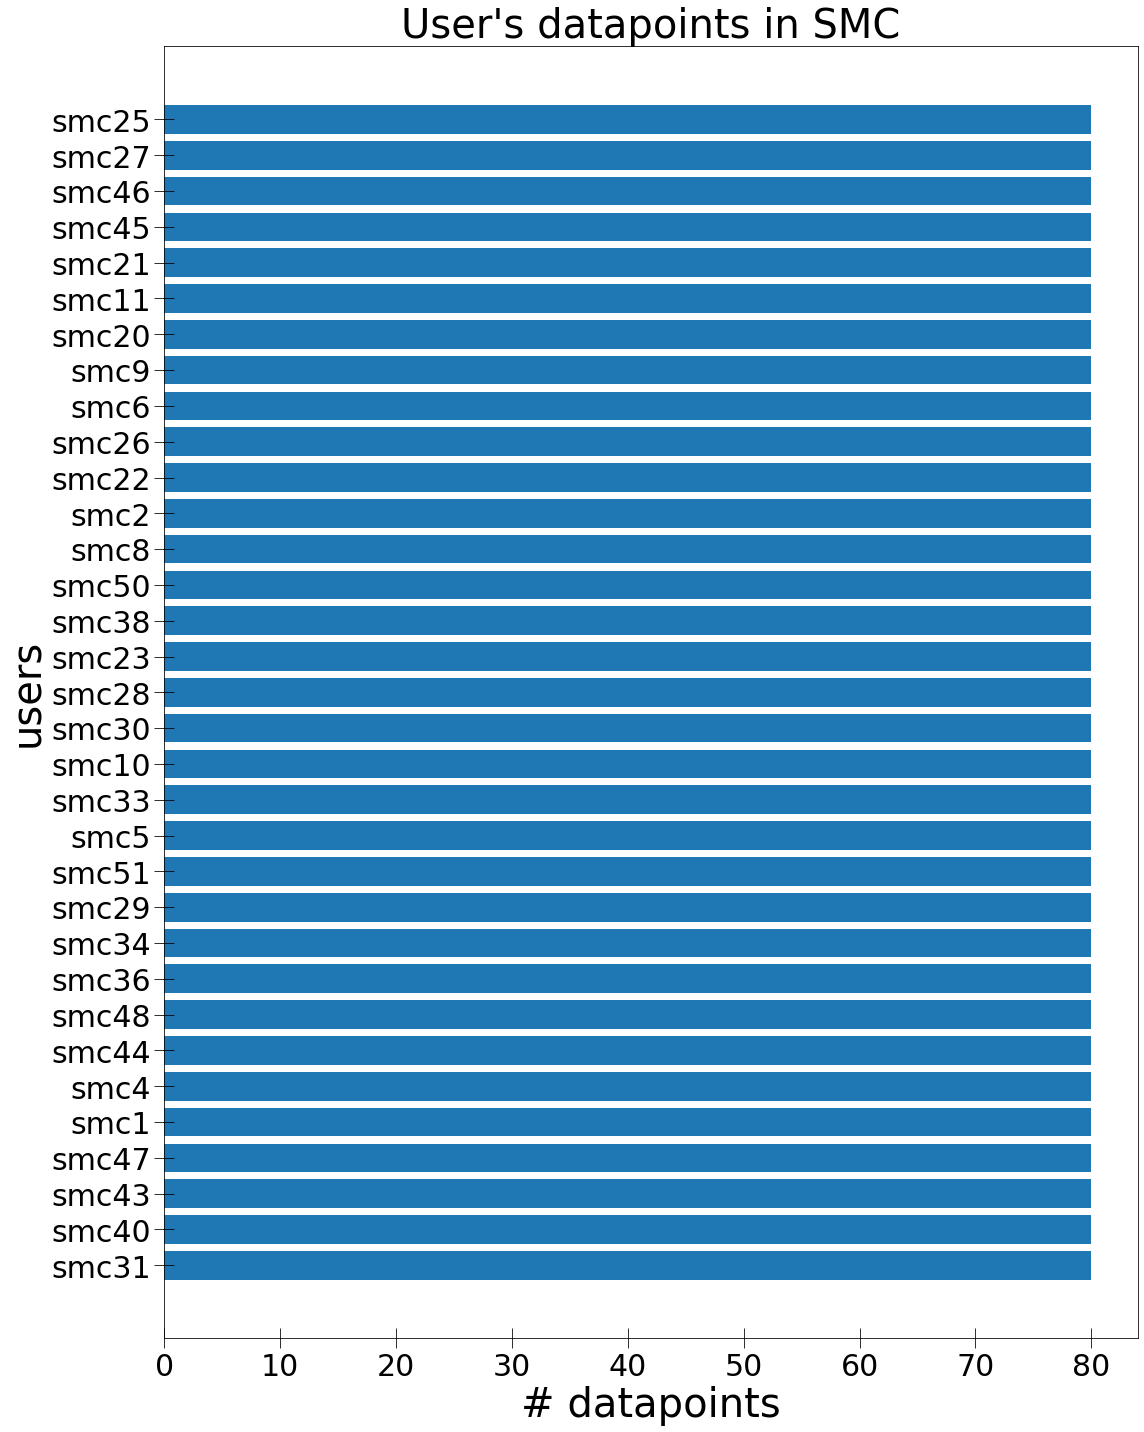

In [14]:
df_smc = pd.read_csv('data/pcs/SMC_combined_survey2.csv')
df_smc_qns = pd.read_csv('data/pcs/210316_SMC_background.csv')

print(f'All participants in comfort data: {df_smc["survey.id"].unique()}')
print(f'Unfiletered rows: {df_smc.shape[0]}')
print(f'Unique users in comfort data: {df_smc["survey.id"].nunique()}') # the paper says 37
print(f'All raw columns for the comfort dataset:\n{df_smc.columns.values}')
print(df_smc.head())
print(f'All raw columns for the physiological dataset :\n{df_smc_qns.columns.values}')
print(f'All participants in qns data: {df_smc_qns["survey id"].unique()}')
print(f'Unique users in qns data: {df_smc_qns["survey id"].nunique()}') # the paper says 37

print(df_smc_qns.head())
print('\n')

# based on the paper https://doi.org/10.1016/j.buildenv.2017.12.011
needed_col_smc = ['survey.id', ## survey
                  'clo',
                  'location.back', ## PCS control behaviour
                  'location.seat', # control location
                  'location.both',
                  'location.none',
                  'back_fan', # control intensity
                  'back_heater',
                  'seat_fan',
                  'seat_heater',
                  'back_fan.frq.1hr', # control freq in the past
                  'back_fan.frq.4hr',
                  'back_fan.frq.1dy',
                  'back_fan.frq.1wk',
                  'back_heater.frq.1hr',
                  'back_heater.frq.4hr',
                  'back_heater.frq.1dy',
                  'back_heater.frq.1wk',
                  'seat_fan.frq.1hr',
                  'seat_fan.frq.4hr',
                  'seat_fan.frq.1dy',
                  'seat_fan.frq.1wk',
                  'seat_heater.frq.1hr',
                  'seat_heater.frq.4hr',
                  'seat_heater.frq.1dy',
                  'seat_heater.frq.1wk',
                  'occupancy.seated', # occupancy status (occupancy freq is missing)
                  'occupancy.unseated',
                  'occupancy.unknown',
                  'back_fan.occupancy.1hr', # ratio of control
                  'back_fan.occupancy.4hr',
                  'back_fan.occupancy.1dy',
                  'back_fan.occupancy.1wk',
                  'back_heater.occupancy.1hr',
                  'back_heater.occupancy.4hr',
                  'back_heater.occupancy.1dy',
                  'back_heater.occupancy.1wk',
                  'seat_fan.occupancy.1hr',
                  'seat_fan.occupancy.4hr',
                  'seat_fan.occupancy.1dy',
                  'seat_fan.occupancy.1wk',
                  'seat_heater.occupancy.1hr',
                  'seat_heater.occupancy.4hr',
                  'seat_heater.occupancy.1dy',
                  'seat_heater.occupancy.1wk',
                  'hr', ## date/time
                  'wdy',
                  'Ta_hobo', ## indoor environment
                  'Top_hobo',
                  'RH_hobo',
                  'Ta.slope_hobo',
                  'Tout', ## outdoor environment
                  'SKC',
                  'Tpma',
                  'precipitation',
                  'Preference', # label (# missing HVAC)
                 ]

neded_col_smc_qns = ['survey id',
                     'sex',
                     'height (in)',
                     'weight (lbs)'
                    ]

df_smc = df_smc[needed_col_smc]
df_smc_qns = df_smc_qns[neded_col_smc_qns]

# raw numbers of the data
user_data_dist = df_smc['survey.id'].value_counts()
print('Raw responses:')
print(f'Total: {user_data_dist.sum()}')
print(f'Average: {user_data_dist.mean()}')
print(f'Min responses/participant: {min(user_data_dist)}')
print(f'Max responses/participant: {max(user_data_dist)}')
print(f'Clothing values:\n{df_smc["clo"].unique()}')
print('\n')

# see if there are missing values
print('Missing rows:')
print(df_smc.isna().sum())
# Ta_hobo                      18
# Top_hobo                     17
# RH_hobo                      18
# Ta.slope_hobo                18
# Tout                          2
# Preference                    4
print('Dropping rows:')
drop_rows = ['Ta_hobo', 
             'Top_hobo',
             'RH_hobo', 
             'Ta.slope_hobo',
             'Tout',
             'Preference'] 
for col in drop_rows:
    df_smc = df_smc[df_smc[col].notna()]
print(df_smc.isna().sum())

# filtering participants with lower than 100 responses and fixing the number of datapoints
num_samples = 60 # 100, 60
user_valid = user_data_dist[user_data_dist > num_samples]
print(f'Users with >= {num_samples} datapoints: {len(user_valid)}')
df_smc_env_subset = pd.DataFrame()
for user in user_valid.index:
    df_user = df_smc[df_smc['survey.id'] == user]
    df_user = df_user.iloc[0:num_samples, :] # take the first num_samples
    df_smc_env_subset = df_smc_env_subset.append(df_user)

df_smc_qns_subset = df_smc_qns[df_smc_qns['survey id'].isin(user_valid.index)]

##### standardising the data to match previous datasets
df_smc_qns_subset['weight (lbs)'] = round(df_smc_qns_subset['weight (lbs)'] / 2.2, 0) # raw data is in pounds
df_smc_qns_subset['height (in)'] = round(df_smc_qns_subset['height (in)'] * 2.54, 0) # raw data is in inches
df_smc_qns_subset = df_smc_qns_subset.rename(columns={'survey id': 'user_id',
                                                      'weight (lbs)': 'weight', 
                                                      'height (in)': 'height'})

df_smc_env_subset = df_smc_env_subset.rename(columns={'survey.id': 'user_id',
                                                'clo': 'clothing'})
df_smc_qns_subset['user_id'] = ['smc' + str(user_id) for user_id in df_smc_qns_subset['user_id']]
df_smc_env_subset['user_id'] = ['smc' + str(user_id) for user_id in df_smc_env_subset['user_id']]
df_smc_env_subset['Preference'] = df_smc_env_subset['Preference'].map({'Warmer': 9.0, 
                                                                       'No change': 10.0, 
                                                                       'Cooler': 11.0})
# def convert_clo(x):
#     if x >= 0.6:
#         return 'Heavy'
#     elif x < 0.6 and x >= 0.4:
#         return 'Medium'
#     elif x < 0.4:
#         return 'Light'

# df_smc_env_subset['clothing'] = df_smc_env_subset['clothing'].apply(lambda x: convert_clo(x))

print(f'Filtered participants:\n{df_smc_qns_subset.sex.value_counts()}')

##### merging both datasets and saving the files
df_smc_env_phy_subset = pd.merge(df_smc_env_subset, df_smc_qns_subset, on='user_id')
print(f'Merged file:\n{df_smc_env_phy_subset}')
df_smc_env_phy_subset.to_csv(f'data/SMC_env_phy_{num_samples}.csv', index=False)
df_smc_qns_subset.to_csv(f'data/SMC_qns_{num_samples}.csv', index=False)

##### plotting
user_subset_dist = df_smc_env_phy_subset['user_id'].value_counts()
figure, ax = plt.subplots(1, 1, figsize=(16, 20))
ax.barh(user_subset_dist.index, user_subset_dist, align='center')

ax.tick_params(length=20, direction="inout", labelsize=30)
ax.set_ylabel('users', size=40)
ax.set_xlabel('# datapoints', size=40)
plt.xticks(rotation=0)
ax.set_title('User\'s datapoints in SMC', size=40)
plt.tight_layout()
plt.show()
figure.savefig(f'img/smc_datadist_{num_samples}.png')
